# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
# from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

## Locking in the random seed numberfor consistance if it works
np.random.seed(300)

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 619
['vaitupu', 'taolanaro', 'jamestown', 'avarua', 'castro', 'nedryhayliv', 'provideniya', 'isangel', 'port alfred', 'butaritari', 'taoudenni', 'hilo', 'shchelyayur', 'nioro', 'dahuk', 'mentok', 'ankang', 'punta arenas', 'mount gambier', 'camacha', 'carnarvon', 'huarmey', 'kununurra', 'north fort myers', 'mocambique', 'bluff', 'buchanan', 'atuona', 'copiapo', 'saldanha', 'albany', 'blackfoot', 'laguna', 'barentsburg', 'mataura', 'hami', 'busselton', 'tigil', 'chuy', 'killybegs', 'coihaique', 'daru', 'kytlym', 'lakheri', 'torbay', 'constantine', 'svetlyy', 'alice springs', 'los llanos de aridane', 'araouane', 'mountain home', 'ilulissat', 'tuktoyaktuk', 'khatanga', 'mugur-aksy', 'breves', 'jiddah', 'zvishavane', 'florencia', 'iqaluit', 'esperance', 'amderma', 'umba', 'vanimo', 'sao joao da barra', 'terrak', 'new norfolk', 'ejido', 'manta', 'aklavik', 'ushuaia', 'north bend', 'sao jose da coroa grande', 'okhotsk', 'sitka', 'kaitangata', 'buraydah', 'basco',

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Testing a single call because the mass called errored out 
# for some reason it was not pulling in the key from from api_keys import weather_api_key 
# even though I had changed the text and saved the file but it works now
# units = "metric"
# base_url = "http://api.openweathermap.org/data/2.5/weather?"
# city_url = f"{base_url}appid={weather_api_key}&q={city}&units={units}"
# city_weather = requests.get(city_url)
# print(city_weather)

<Response [200]>


In [24]:
# reading the json from the pull it works just fine
# city_weather_json = city_weather.json()
# pprint(city_weather_json)

{'base': 'stations',
 'clouds': {'all': 86},
 'cod': 200,
 'coord': {'lat': -20.4081, 'lon': 57.7},
 'dt': 1680491474,
 'id': 934322,
 'main': {'feels_like': 29.41,
          'grnd_level': 1010,
          'humidity': 81,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 26.81,
          'temp_max': 26.81,
          'temp_min': 26.81},
 'name': 'Mahébourg',
 'rain': {'1h': 0.22},
 'sys': {'country': 'MU',
         'id': 2002134,
         'sunrise': 1680488194,
         'sunset': 1680530902,
         'type': 2},
 'timezone': 14400,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 53, 'gust': 5.44, 'speed': 3.85}}


In [25]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | nedryhayliv
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | isangel
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | taoudenni
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | shchelyayur
City not found. Skipping...
Processing Record 14 of Set 1 | nioro
Processing Record 15 of Set 1 | dahuk
Processing Record 16 of Set 1 | mentok
City not found. Skipping...
Processing Record 17 of Set 1 | ankang
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | mount gambier
Processing Record 20 of Set 1 | camacha
Processing R

Processing Record 37 of Set 4 | baruun-urt
Processing Record 38 of Set 4 | polovinnoye
Processing Record 39 of Set 4 | port elizabeth
Processing Record 40 of Set 4 | vardo
Processing Record 41 of Set 4 | homer
Processing Record 42 of Set 4 | potiskum
Processing Record 43 of Set 4 | narsaq
Processing Record 44 of Set 4 | korla
Processing Record 45 of Set 4 | san cristobal
Processing Record 46 of Set 4 | lakshettipet
Processing Record 47 of Set 4 | makat
Processing Record 48 of Set 4 | nikolskoye
Processing Record 49 of Set 4 | sotuta
Processing Record 0 of Set 5 | constitucion
Processing Record 1 of Set 5 | kendari
Processing Record 2 of Set 5 | san patricio
Processing Record 3 of Set 5 | norman wells
Processing Record 4 of Set 5 | ngunguru
Processing Record 5 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 6 of Set 5 | lamont
Processing Record 7 of Set 5 | lima
Processing Record 8 of Set 5 | sabang
Processing Record 9 of Set 5 | chulman
Processing Record 10 of Set

Processing Record 25 of Set 8 | yar-sale
Processing Record 26 of Set 8 | boende
Processing Record 27 of Set 8 | jinchang
Processing Record 28 of Set 8 | ambon
Processing Record 29 of Set 8 | milot
Processing Record 30 of Set 8 | bell ville
Processing Record 31 of Set 8 | haines junction
Processing Record 32 of Set 8 | bilma
Processing Record 33 of Set 8 | talcahuano
Processing Record 34 of Set 8 | da nang
Processing Record 35 of Set 8 | ugoofaaru
Processing Record 36 of Set 8 | riviere-au-renard
Processing Record 37 of Set 8 | digboi
Processing Record 38 of Set 8 | heidelberg
Processing Record 39 of Set 8 | naron
Processing Record 40 of Set 8 | pevek
Processing Record 41 of Set 8 | miraflores
Processing Record 42 of Set 8 | storsteinnes
Processing Record 43 of Set 8 | freeport
Processing Record 44 of Set 8 | asau
Processing Record 45 of Set 8 | angoram
Processing Record 46 of Set 8 | kamenka
Processing Record 47 of Set 8 | klaksvik
Processing Record 48 of Set 8 | banmo
City not found. 

Processing Record 12 of Set 12 | linares
Processing Record 13 of Set 12 | kargasok
Processing Record 14 of Set 12 | krasnyy chikoy
Processing Record 15 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 16 of Set 12 | fuerte olimpo
Processing Record 17 of Set 12 | churapcha
Processing Record 18 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 19 of Set 12 | bayan
Processing Record 20 of Set 12 | miri
Processing Record 21 of Set 12 | bajitpur
Processing Record 22 of Set 12 | kavieng
Processing Record 23 of Set 12 | ilebo
Processing Record 24 of Set 12 | ribas do rio pardo
Processing Record 25 of Set 12 | taunton
Processing Record 26 of Set 12 | hambantota
Processing Record 27 of Set 12 | srednekolymsk
Processing Record 28 of Set 12 | parkes
Processing Record 29 of Set 12 | brae
Processing Record 30 of Set 12 | balykshi
Processing Record 31 of Set 12 | wenling
Processing Record 32 of Set 12 | pacifica
Processing Record 33 of Set 12 | takanabe
Process

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,1.80,53,100,2.57,US,1680491401
1,avarua,-21.2078,-159.7750,27.03,69,75,3.60,CK,1680491491
2,castro,-24.7911,-50.0119,13.37,99,9,2.90,BR,1680491491
3,nedryhayliv,50.8340,33.8763,6.76,88,100,6.02,UA,1680491491
4,provideniya,64.3833,-173.3000,-10.91,67,75,4.02,RU,1680491492


In [33]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
print(city_data_df.dtypes)
city_data_df.head()

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,1.80,53,100,2.57,US,1680491401
1,avarua,-21.2078,-159.7750,27.03,69,75,3.60,CK,1680491491
2,castro,-24.7911,-50.0119,13.37,99,9,2.90,BR,1680491491
3,nedryhayliv,50.8340,33.8763,6.76,88,100,6.02,UA,1680491491
4,provideniya,64.3833,-173.3000,-10.91,67,75,4.02,RU,1680491492


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

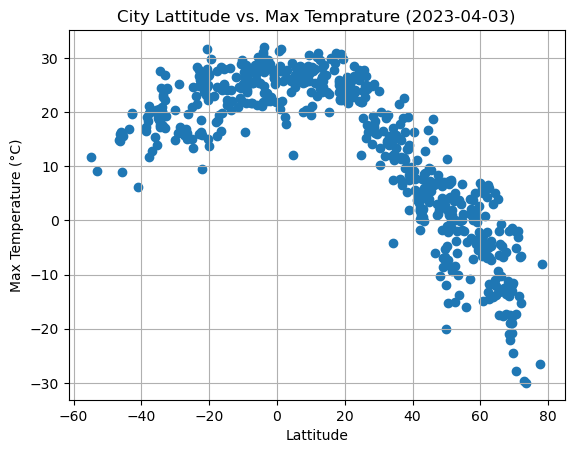

In [3]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]    #.astype("float")
y_values = city_data_df["Max Temp"]    #.astype("float")

plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title('City Lattitude vs. Max Temprature (2023-04-03)')
plt.xlabel('Lattitude')
plt.ylabel('Max Temperature (°C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

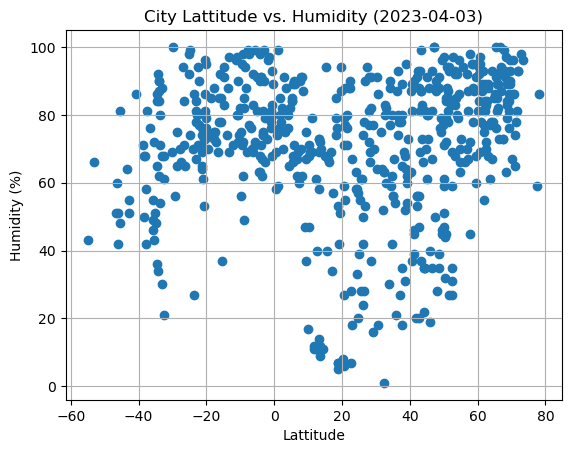

In [4]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]    #.astype("float")
y_values = city_data_df["Humidity"]    #.astype("float")

plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title('City Lattitude vs. Humidity (2023-04-03)')
plt.xlabel('Lattitude')
plt.ylabel('Humidity (%)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

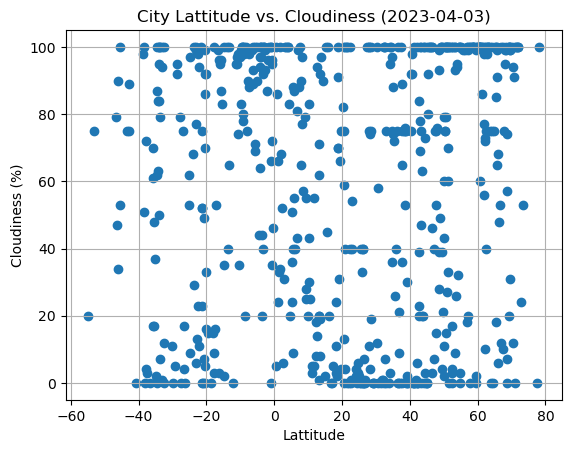

In [5]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]    #.astype("float")
y_values = city_data_df["Cloudiness"]    #.astype("float")

plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title('City Lattitude vs. Cloudiness (2023-04-03)')
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

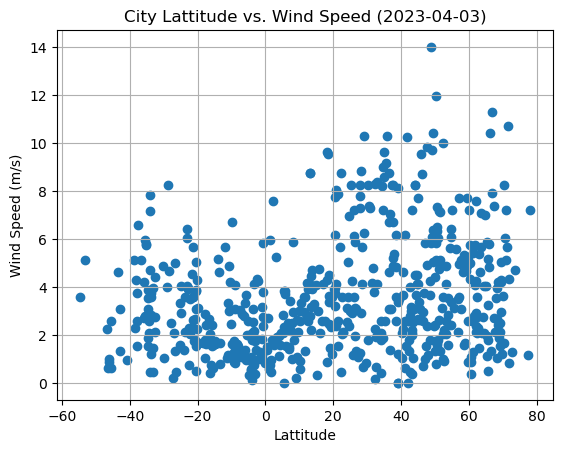

In [6]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]    #.astype("float")
y_values = city_data_df["Wind Speed"]    #.astype("float")

plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title('City Lattitude vs. Wind Speed (2023-04-03)')
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [7]:
# Define a function to create Linear Regression plots
## I have no idea if this is correct 
def linear_regres(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r-")
#     plt.annotate(line_eq,(0,5),fontsize=15,color="red")
    plt.title(line_eq,fontsize=12,color="red")
    print(f"R squared: {rvalue**2}")
    plt.plot()  #do I need to return in front

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,1.80,53,100,2.57,US,1680491401
3,nedryhayliv,50.8340,33.8763,6.76,88,100,6.02,UA,1680491491
4,provideniya,64.3833,-173.3000,-10.91,67,75,4.02,RU,1680491492
7,butaritari,3.0707,172.7902,27.88,75,100,5.26,KI,1680491494
8,taoudenni,22.6783,-3.9836,26.73,7,0,3.60,ML,1680491494


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,avarua,-21.2078,-159.7750,27.03,69,75,3.60,CK,1680491491
2,castro,-24.7911,-50.0119,13.37,99,9,2.90,BR,1680491491
5,isangel,-19.5500,169.2667,29.79,70,15,1.68,VU,1680491492
6,port alfred,-33.5906,26.8910,22.77,71,100,3.75,ZA,1680491493
13,punta arenas,-53.1500,-70.9167,9.06,66,75,5.14,CL,1680491496


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.8223848083695564


[]

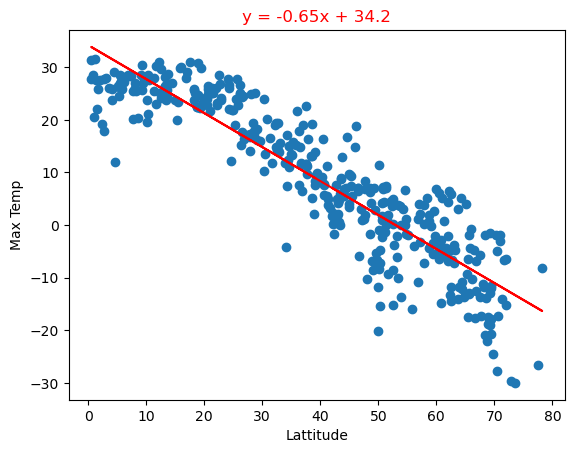

In [10]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Max Temp"].astype("float")
linear_regres(x_values,y_values)

plt.xlabel('Lattitude')
plt.ylabel('Max Temp')
plt.plot()

R squared: 0.4397959500050167


[]

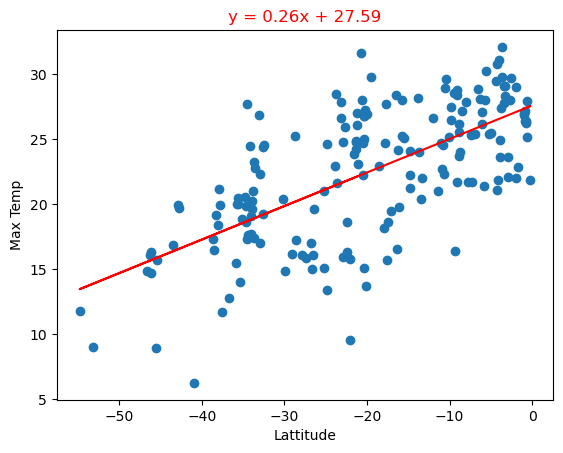

In [11]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Max Temp"].astype("float")
linear_regres(x_values,y_values)

plt.xlabel('Lattitude')
plt.ylabel('Max Temp')
plt.plot()

**Discussion about the linear relationship:**

Looking at the two carts the first thing we need to mention is the first chart with the positive Latitudes the numbers are descending indicating negative regression and the chart with the negative Latitudes looks like positive regression.  This will apply to all the following charts.  

They both have an absolute decrease in temperature the farther away from zero Latitude which is the Earths equator and should be the warmest with the constant and consistent sun rays.  

That is exactly what these charts are showing and the rsquared is telling us that in general this is a true statement.  The farther away from Latitude 0 the cooler it will most likely be.   However, this is more likely in the norther hemisphere than in the southern hemisphere.  The reason would have to be investigated.   

Of Note:  It appears we have more datapoint with almost 2.5x more north hemisphere to sourther hemispher datapoints) in the norther hemisphere which makes a lot of sense with most of the livable land is north of the equator. With a quick google search we can see why:

>“Northern Hemisphere population is 6.96 billion people (**87.0% of the earth's total human population**). Southern Hemisphere population is 1.04 billion people (**13% of the population**)”. 
 

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.09532861951135746


[]

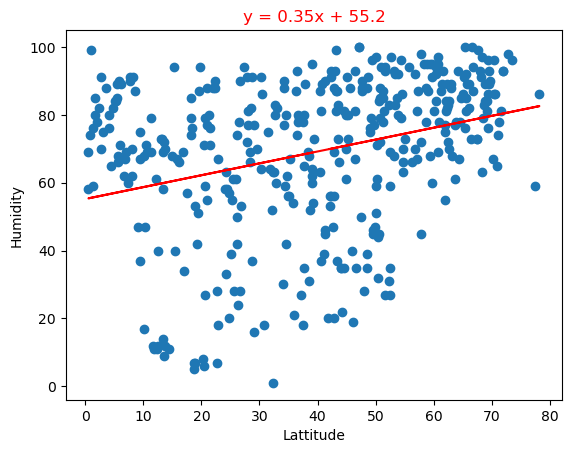

In [12]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Humidity"].astype("float")
linear_regres(x_values,y_values)

plt.xlabel('Lattitude')
plt.ylabel('Humidity')
plt.plot()

R squared: 0.19155839659025095


[]

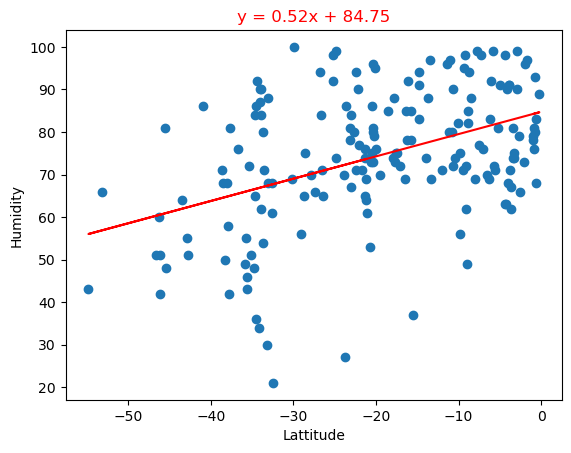

In [13]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")
linear_regres(x_values,y_values)

plt.xlabel('Lattitude')
plt.ylabel('Humidity')
plt.plot()

**Discussion about the linear relationship:** 

With respect to humidity and how far north or south the reading was taken is a little less unclear.  We can see regression as the data does tend for follow a bit of a slop in that it is more humid the closer to the equator.  That said there is a lot more variance and the rsquard is pretty low meaning that based off of this data we can not really predict a humidity based off a given latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.05570490852098065


[]

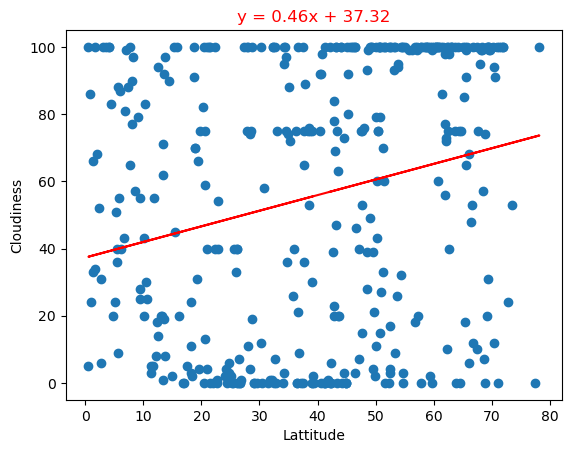

In [14]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Cloudiness"].astype("float")
linear_regres(x_values,y_values)

plt.xlabel('Lattitude')
plt.ylabel('Cloudiness')
plt.plot()

R squared: 0.08738086883116805


[]

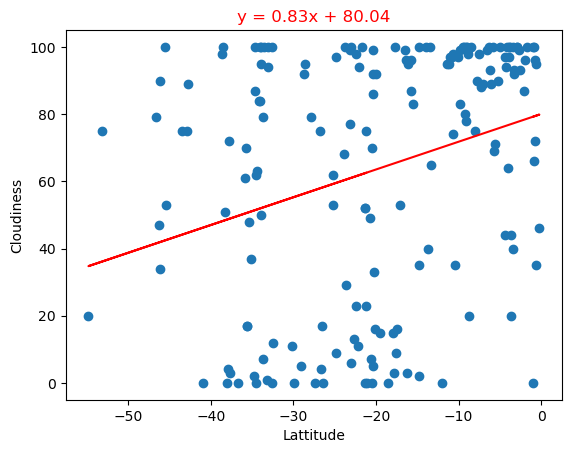

In [15]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Cloudiness"].astype("float")
linear_regres(x_values,y_values)

plt.xlabel('Lattitude')
plt.ylabel('Cloudiness')
plt.plot()

**Discussion about the linear relationship:** 

With respect to cloudiness at different latitudes. It is just as hard to see a decent rsquared.  The number is quit small but we do see a general liner line moving, but this time we see that in the NH (northern hemisphere) the line climbs (getting more cloudy) as we moved away from the equator but in the SH (southern hemisphere) it looks like cloudiness gets less as we move from the equator.  So this one is a bit different than the other relationships 


### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.017103556181949697


[]

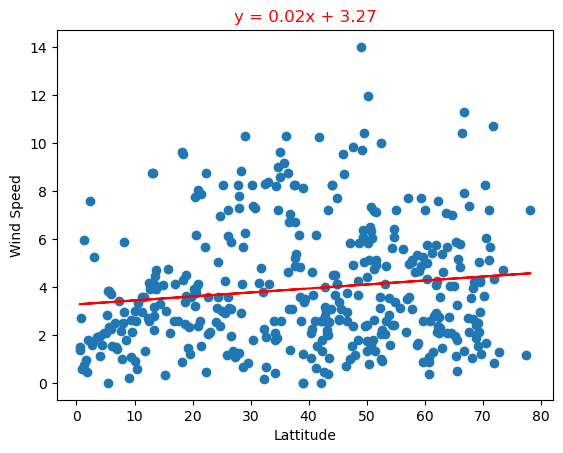

In [16]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Wind Speed"].astype("float")
linear_regres(x_values,y_values)

plt.xlabel('Lattitude')
plt.ylabel('Wind Speed')
plt.plot()

R squared: 0.06382189833662637


[]

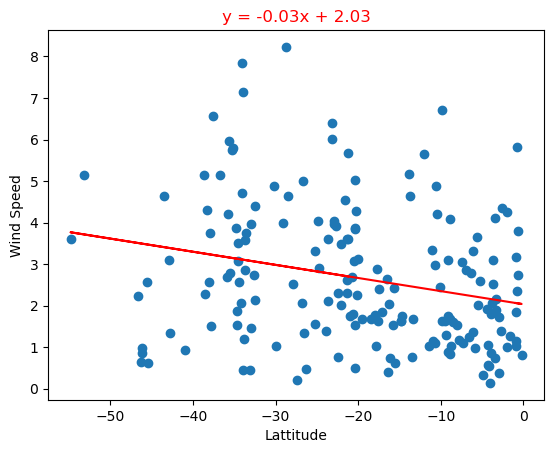

In [17]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Wind Speed"].astype("float")
linear_regres(x_values,y_values)

plt.xlabel('Lattitude')
plt.ylabel('Wind Speed')
plt.plot()

**Discussion about the linear relationship:** 

Lastly we have and both of these charts have the flattest regression line with pretty low rsquared values.  This tells us it is less likely latitude has much to do with wind intensity.  There is a small but again flat correlation to a slightly higher wind the further away from 0 lat. 
